# Udacity Capstone Project Write Up
This Notebook breaks down the whole methodology of the Capston Project. It contains the following points: 
<br><br>
#### Project Definition
* *Project Overview:* Gives a high level overview of the project and describes what it contains
* *Goal Description:* Describes the goal which should be achieved with the project
* *Metrics:* Describes Metrics which are used to evaluate the project models
#### Analysis
* *Data Exploration:* Describes the dataset which will be used for the app
* *Data Visualization:* Describes which data visualization will be made in the app
#### Prediction Methodology
* *Data Preprocessing:* Describes the preprocessing of the data wich is necessary to use the chosen model
* *Implementation:* Describes the chosen models and the necessary parameters 
* *Refinement:* Describes the possibility of the app to refine the model
#### Results
* *Model Evaluation:* Describes how the app allows you to evaluate the model 
* *App Functionalities:* Wraps up the created functionalities
#### Conclusion
* *Reflection:* Summarizes the whole project and recaps the most important parts of it
* *Improvements:* Describes Improvements which can be made to the project so it gets to the next level




----------------------------------------------------------------------------------------------------------------

# Project Definition

## Project Overview
The project is about creating a analytics and prediciton app for desired stock prices. The approach for this can be seperated in three main steps: 
* Getting stock Data from Yahoo Finance based on the users inputs 
* Creating a LSTM NeuralNetwork Class in python which contains multiple functions which can get executed via the app 
* Settin up a App Frontend with Streamlit to connect the Backend functionality into the users GUI

## Goal Description
The goal of this project is to prepare both stock analytics and stock predictions within one web app. In the end the user should be able to do the following things:
* Analyzing the desired Stock data based on visuals of both the raw data and important Stock Market metrics
* Testing the performance of an LSTM model for stock prediction based on both visuals and Regression Evaluation Metrics
* Creating a prediction for the next future Closing price of the desired stock value

## Metrics
This project tackles a Regression Task. That's why I used both the Mean Absolute Error (MAE) for a general evalution of the result and the Mean Squared Error (MSE) for taking higher errors more into acount. 

----------------------------------------------------------------------------------------------------------------

# Analysis

## Data Exploration
For getting the users desired stock data we used a library called yfinance. This allows us to easily query stock data from the Yahoo Finance platform. As you can see below the data comes by default with 6 different columns and a Date index. In our case we only care about the `Close` Column, which is our target and the `Date`index which will be needed for our visuals. The data is already in numeric format which enables us to directly go to the transformation part. 

In [3]:
import yfinance as yf
stock = yf.download(
        'AAPL', start='2021-01-01', end='2021-12-01', progress=False
    )
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.877014,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824326,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117844,109578200


## Data Visualization
To give the user the possibility to explore the stock data I've implemented different visuals within the app. To give a really good analysis base I've implemented not only the raw data in the plot but also useful stock market metrics like Bollinger Bands, MACD (Moving Average Convergence-Divergence) and RSI (Relative Strength Index). Those can be read up in more detail in the ReadMe file of this project. 
Besides that I also visualized within the Prediction Part of the project. This is also explained in detail within the ReadMe of the project. It basically enables the user to validate the Test Predictions within a Visual. 

----------------------------------------------------------------------------------------------------------------

# Prediction Methodology
To organize the code and prepare an step by step pipeline I decided to create a class called `LstmPredictionModel` within the `model_creation/lstm_model.py` file. This contains all the necessary functions which will be excecuted on specific user actions within the `app.py` file. 

## Data Preprocessing
Since we're training a LSTM (Long-Short-Term-Memory) Network we have to preprocess the data so it is in a way the model can understand it. First of all I normalized the data by using the MinMaxScaler ok sklearn. The scaled data was then used to create both X_train and y_train. For every y_train I use the users input for the backshifting to say how many days of data X_train should contain to predict y_train. After this I reshaped the data so we have 3 dimensions for training the model. The same process was made to create a X_test set to make my test predictions. 

## Implementation 
The model I use here is a STM (Long-Short-Term-Memory) Network. It is widely used for giving a try on stock predictions because is it can differ past important information from not so important information. As LSTM models expect 3D data we had to reshape data like I stated in the step before. Those 3 Dimensions can be defined like the following:<br><br>
* *batch_size:* how many values in each testin/training process<br><br>
* *timestamps:* what is the size of a sequence - in our case the size of old values to predict a new one<br><br> 
* *features:* size of the output array<br><br> 
To create an LSTM we have to know to focus 
A LSTM has three gates: <br><br>
* *Input gate:* Adds Information to the models cell state<br><br>
* *Forget gate:* Removes no longer required information<br><br>
* *Output gate:* Gives desired information as output<br><br>
After each Input and Hidden Layer we also add a Dropout Layer. Those help to prevent the model from overfitting. A rule of thumb is to use 0.2 as the value for those Dropout Layers. 
For tuning the the models parameters there is not really a rule to do that. That is why the app itself should give the possibility to tweek the models parameters like the batch_size and training epochs.
To give the user the possibility to do that, I've created the dynamic model parameters in the streamlit application. So the user can not only change the model epochs and the batchsize but also the timestamp parameter (backshifting size), which is the number of days the model takes into account to predict a the next value. You can read this up more specifcally in the ReadMe. By changing the parameters and hitting training button the user will be able to see how well the model performed in comparison to other parameters based on the TestVisuals and the chose evaluation metrics

## Refinement
Like it says in the Implementation section the user is able to tweek the models most important paramaters to see which of them perform the best. If the user is happy with the result she/he can click the button to produce real predictions to get a real future result. 

----------------------------------------------------------------------------------------------------------------

# Results

## Model Evaluation: 
Looking at the Plot of some test predictions below the LSTM model works quite well for stock predictions. Tweeking the number of epochs and also the backshifting can also have a big influence on the result. For instance training the model for the PayPal stock with a epoch size of 100 and a backshifting of 60 days leads to a MeanAbsolute Error of 7 and a MeanSquarredError of 70. If we backshift the data for 7 days instead the MAE is 5 and the MSE 46. That probably means that the model had to deal with more fluctuations with the higher day range which affects the result which is why for this specific stock it could be mor applicable to set the backshifting to a lower level. 
Prediction the stock market is really hard since we don't any other data features than the price itself. But LSTM models can fit the trend pretty well. Tweeking paramter helps to undertstand the affect of specific data points way better. 
Still - please do not consider the predicted price of an LSTM model as a financial advice!

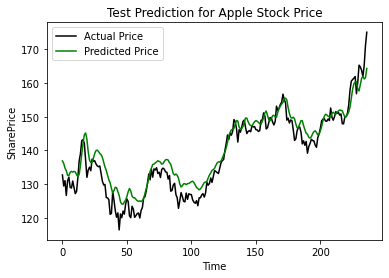

In [2]:
from IPython import display
display.Image("helpers/output.png")

## App Funcionalities 
The outcome of this project is a webapp that allows the user to both analyze desired stock data with integrated stock market metrics and also to train a LSTM model that evaluates the models performance and even gives an estimation about the upcoming value. 
Of course I will try enhance this project even more like adding parameters or maybe changing the code itself to add new functionalities. But the purpose of this project was to showcase both the Sofware- and Data Science Skills I've gathered throughout the Udacity Data Science Nanodegree. 



## Justification

Due to the justification of the model we can say that inreasing the number of epochs for instance enhances the result. This may be due to the fact that the model has mor time to find patterns within the the backshiftet time section. But this also leads to longer training time which is communicated to the user next to the value slicer. It also seams that the model works better if the number of days which get taken in consideration for the prediction is lower. That maybe due the fact that the model does not have to deal with many fluctuations in a shorter term which could lead to a better performacne especially for stable stock values like Apple. 
As example the model with 100 epochs and 14 days for the timestamp paramter has an MAE of around 40 while increasing the timestamp parameter leads to an MAE of around 45 for the Tesla stock. 
If we increase the number of epochs to 200 for instance for the apple stock we get really good results for the MAE - about only 3. If we have a look at the prediction for the upcoming closing price compared to the last closing price it looks not to off from reality as well. But keep in mind that increasing the number of epochs could lead to overfitting of the data. That is sth could care about with the Dropout Layer mentioned above.
So by testing with the app I kept with pattern of taking a higher number of epochs and an smaller parameter for the timestamp value (so how many das do we consider for the predictions). It may also depend on the use case - so do you want to know how to market reacts in short term or a you an long term investor who is only interested in general direction of the course (for instance ETF investors strategy). In a long-term scenario we should definitely increase the backshifting. 

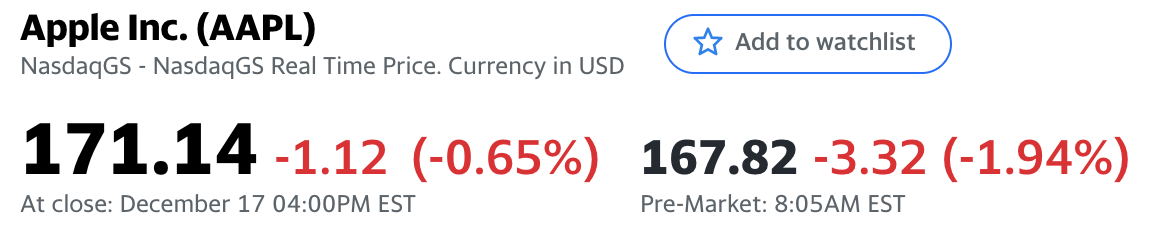

In [6]:
display.Image("helpers/yfinance_apple.png")

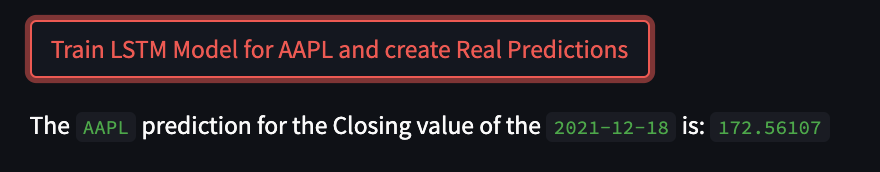

In [7]:
display.Image("helpers/app_200_apple_stock.png")

# Conclusion

## Reflection 
To wrap the up this project we want to use the three main parts we pointed out in the beginning. That way we can discuss challenges and achievements throughout the project in a structured way.<br><br>
* *Analyzing the desired Stock data based on visuals of both the raw data and important Stock Market metrics:*<br><br>
Collecting the data was luckily really for this project since yfinance is a very good library based on the Yahoo Finance platform which allows us to read any desired stock data directly into a pandas dataframe. Based on that data we were able to use another really useful finance library called ta, which allowed us to directy create some really useful stock market metrics like Bollinger Bands. For the user analyszing comes most of the together with visualization. This could be done really conveniently by using the streamlit library based on our created stockmetric dataframe. So to reflect this part of the project we can say, that the combination of streamlit, yfinance and ta worked really well to build a analyzing feature for users who want to see their desired stocks and some analysis metrics based on it. This can be easily adjusted with other metrics, charts, tables etc. <br><br>


* *Testing the performance of an LSTM model for stock prediction based on both visuals and Regression Evaluation Metrics:* <br><br>
Based on some research we've chosen the LSTM Network as our desired model. By using the libraries sklearn, keras and tensorflow we were able both prepare the data for the training/testing and also to create a LSTM model with its own functions for training and testing. By creating a own class for our LSTM we were not only able to create structured code but also to give the user the opportunity to change the parameters of the model dynamically. One challenge was to cover all the neccessary step of the app within one single class. To reach this we created new parameters within the __init__ function throughout executing the class functions. That way all of the necessary values were available throughout the whole pipeline process. For testing our model we used the MAE and MSE. The combination of those Error Values, the TestPredicitonPlots and the dynamic paramater change possibility fo the user enabled our app to be a nice feature for testing the performance different parameter combination for different stock values. <br><br>

* *Creating a prediction for the next future Closing price of the desired stock value:*<br><br>
Last but not last we've added a fucnction to our class that enabled the user to create a real prediction for the next day of our testdata. In this case real prediction means predicting a value for which we do not have any comparison value yet. It does not mean that this prediction will be the ral price of the stock!!! The initial idea is that the user can play around with the testing button to find out the best model parameters and after she/he is done with that she/he can crate a `real` prediction with the prediction button of the app. To recap the prediction part we can say, that the combination of streamlit and machine learning libraries can be really help- and powerful. For us as Data Scientists is very easy to handover all the functionalities of our models to users which don't have the necessary programming background. That way both the users and we can play around with parameters in a visual way. That makes data science much more tangible for users.

## Improvements
Of course we also want to do a critical reflection for the project. As stated before the current version of the project is already quite helpful. But there many ways to improve this project even further both from a users and performance perspective. For describing some improvements I'll use the same structure as we have in the Reflection part. <br><br>
* *Analyzing the desired Stock data based on visuals of both the raw data and important Stock Market metrics:*<br><br>
This part of the project has really high potential for further extensions. For now we only displayed the raw data and some analytic metrics based on it. But what about the signals we get from thos stock market metrics. For instance we could implement real Buy or Sell Signals based on those metrics - e.g. if the RSI crosses the 30 Line from below we could notify the user in some way to show that this could be a Buy Signal. From a code perspective we could also try to use other plotting libraries like plotly which is a bit more user friendly I guess when it comes to interactive stuff like hovering from my perspective. <br><br>


* *Testing the performance of an LSTM model for stock prediction based on both visuals and Regression Evaluation Metrics:* <br><br>
Within the Prediction part it is already possible to create test prediciton and evaluate the results based on comparison charts and Evaluation metrics. However, we could also try to test other models for this kind of prject instead of LSTM - e.g. ARIMA model for TimeSeriesForecasting or the RandomForestRegressor as an Ensemble model. That would be a really helpful improvement of the project so the user can decide by her/himself which kind of model she/he wants to use for the prediction. Besides a next step could also be to plot a loss function that shows the user at which epoch the loss stops to decrease. That would help to chose the right amount of epochs which helps to save training time as well.<br><br> 

* *Creating a prediction for the next future Closing price of the desired stock value:*<br><br>
In the current state the model takes the testdataset and creates a prediction for the next day of this dataset. A improvement on this would be that the user is able to chose how many days she/he wants to predict in the future. So instead of saying that she/he automatically gets only the next day, they app would let them decide about the size of the prediction set. In this case we would have to document this feature really well since the model would then start to use predcitions to make other predictions. 


### Thx again to the Udacity Team for this amazing course - I learned a lot from this!!